In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, Adagrad, RMSprop
from keras.callbacks import History
import matplotlib.pyplot as plt
np.random.seed(13)

Using TensorFlow backend.


In [2]:
#Loading the training and testing data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [3]:
#Normalize the data
X_train -= np.mean(X_train)
X_train /= np.std(X_train)
X_test -= np.mean(X_test)
X_test /= np.std(X_test)

In [4]:
#Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [5]:
#Initializing the values for the multi layer perceptron
batch_size = 128
nb_epoch = 20

In [6]:
test_optimizer_1 = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [7]:
history = History()

In [8]:
def plot_history_loss(hist):
    
    validation_loss = hist.history['val_loss']
    
    plt.plot(range(1,nb_epoch+1), validation_loss)
    plt.ylabel('VALIDATION LOSS')
    plt.xlabel('EPOCH')
    plt.axis('tight')
    plt.xlim(1,nb_epoch)
    plt.xticks(np.arange(1, nb_epoch+1, 1.0))
    plt.show()

In [9]:
def plot_history_accuracy(hist):
    
    validation_accuracy = hist.history['val_acc']
    
    plt.plot(range(1,nb_epoch+1), validation_accuracy)
    plt.ylabel('VALIDATION ACCURACY')
    plt.xlabel('EPOCH')
    plt.axis('tight')
    plt.xlim(1,nb_epoch)
    plt.xticks(np.arange(1, nb_epoch+1, 1.0))
    plt.show()

In [10]:
#Buliding the first layer (Dense Layer) of the network
def build_layer_1(nodes):
    
    model = Sequential()
    model.add(Dense(nodes, input_shape=(784,)))
    return model

In [11]:
#Adding dropout to the model(network)
def add_droput(model, x):
    
    model.add(Dropout(x))
    return model

In [12]:
#Adding a dense layer to the model(network)
def add_dense(model,nodes):
    
    model.add(Dense(nodes))
    return model

In [13]:
#Adding a activation layer to the model(network)
def add_activation(model, activation):
    
    model.add(Activation(activation))
    return model

In [14]:
#The final step in building the model, compiling and fitting the model to the data
def build_layer_final(model, loss = 'categorical_crossentropy', optimizer = 'SGD',\
                           metrics = ['accuracy']):
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    hist = compile_fit_score_model(model, loss, optimizer, metrics)
    return hist

In [15]:
#Compiling, fitting and scoring the model
def compile_fit_score_model(model_final, loss, optimizer, metrics):
    
    model_final.compile(loss = loss,
              optimizer = optimizer,
              metrics = metrics)
    
    hist = model_final.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, \
                    validation_data=(X_test, Y_test))
    
    score = model_final.evaluate(X_test, Y_test, verbose=0)
    
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    
    return hist

In [16]:
#2 Hidden Layers - TanH Activation
def build_layers():
    
    #Input Layer + First hidden layer
    model = build_layer_1(512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model)
    
    return hist

In [17]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.6014 - acc: 0.8256 - val_loss: 0.3264 - val_acc: 0.9077
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3512 - acc: 0.8967 - val_loss: 0.2733 - val_acc: 0.9209
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3031 - acc: 0.9108 - val_loss: 0.2478 - val_acc: 0.9287
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2770 - acc: 0.9180 - val_loss: 0.2308 - val_acc: 0.9334
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2562 - acc: 0.9229 - val_loss: 0.2174 - val_acc: 0.9370
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2421 - acc: 0.9283 - val_loss: 0.2061 - val_acc: 0.9407
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2275 - acc: 0.9331 - val_loss: 0.1951 - val_acc

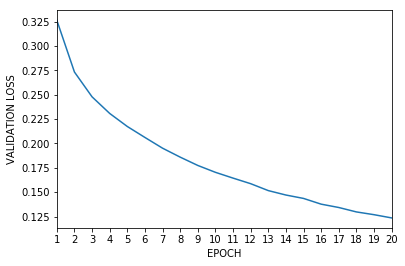

In [18]:
plot_history_loss(hist)

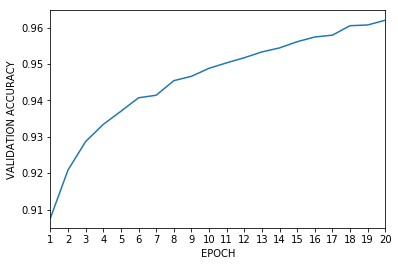

In [19]:
plot_history_accuracy(hist)

In [20]:
#2 Hidden Layers - Relu Activation
def build_layers():
    
    #Input Layer + First hidden layer
    model = build_layer_1(512)
    model = add_activation(model, 'relu')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,512)
    model = add_activation(model, 'relu')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model)
    
    return hist

In [21]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.6679 - acc: 0.7960 - val_loss: 0.2985 - val_acc: 0.9159
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3431 - acc: 0.8980 - val_loss: 0.2361 - val_acc: 0.9328
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2837 - acc: 0.9160 - val_loss: 0.2051 - val_acc: 0.9409
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2434 - acc: 0.9271 - val_loss: 0.1814 - val_acc: 0.9471
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2194 - acc: 0.9344 - val_loss: 0.1647 - val_acc: 0.9518
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2020 - acc: 0.9411 - val_loss: 0.1540 - val_acc: 0.9539
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1855 - acc: 0.9448 - val_loss: 0.1439 - val_acc

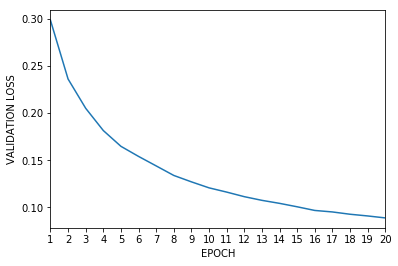

In [22]:
plot_history_loss(hist)

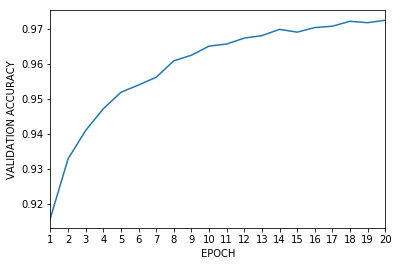

In [23]:
plot_history_accuracy(hist)

In [24]:
#2 Hidden Layers - TanH Activation, Increase number of nodes
def build_layers():
    
    #Input Layer + First hidden layer
    model = build_layer_1(1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model)
    
    return hist

In [25]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.5321 - acc: 0.8432 - val_loss: 0.3021 - val_acc: 0.9118
Epoch 2/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.3212 - acc: 0.9051 - val_loss: 0.2584 - val_acc: 0.9248
Epoch 3/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2823 - acc: 0.9172 - val_loss: 0.2353 - val_acc: 0.9311
Epoch 4/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.2569 - acc: 0.9256 - val_loss: 0.2168 - val_acc: 0.9372
Epoch 5/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.2376 - acc: 0.9307 - val_loss: 0.2038 - val_acc: 0.9411
Epoch 6/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.2247 - acc: 0.9339 - val_loss: 0.1933 - val_acc: 0.9431
Epoch 7/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.2102 - acc: 0.9387 - val_loss: 0.

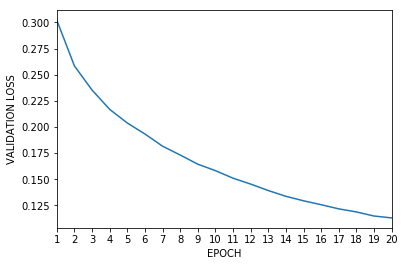

In [26]:
plot_history_loss(hist)

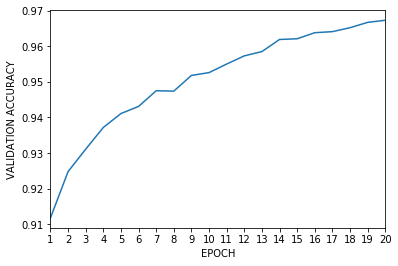

In [27]:
plot_history_accuracy(hist)

In [28]:
#3 Hidden Layers - TanH Activation, Increase number of hidden layers
def build_layers():
    
    #Input Layer + First hidden layer
    model = build_layer_1(512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    model = add_dense(model,512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model)
    
    return hist

In [29]:
hits = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.5808 - acc: 0.8282 - val_loss: 0.3068 - val_acc: 0.9129
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.3378 - acc: 0.8992 - val_loss: 0.2620 - val_acc: 0.9227
Epoch 3/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2968 - acc: 0.9122 - val_loss: 0.2382 - val_acc: 0.9306
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2712 - acc: 0.9192 - val_loss: 0.2213 - val_acc: 0.9359
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2506 - acc: 0.9247 - val_loss: 0.2068 - val_acc: 0.9397
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2342 - acc: 0.9303 - val_loss: 0.1949 - val_acc: 0.9434
Epoch 7/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2197 - acc: 0.9349 - val_loss: 0.

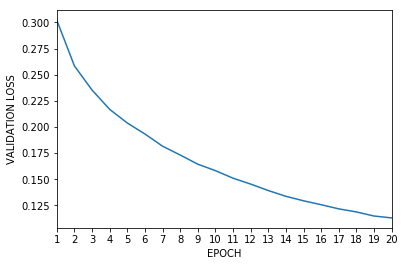

In [30]:
plot_history_loss(hist)

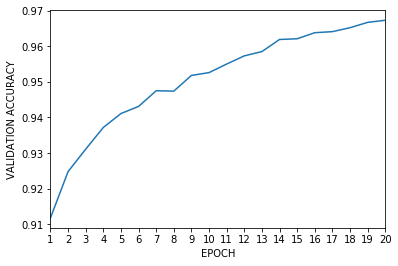

In [31]:
plot_history_accuracy(hist)

In [32]:
#3 Hidden Layers - TanH Activation,  RMSprop Optimizer
def build_layers():
    
    #Input Layer + First hidden layer
    model = build_layer_1(512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    model = add_dense(model,512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model, optimizer = 'rmsprop')
    
    return hist

In [33]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.3615 - acc: 0.8968 - val_loss: 0.1489 - val_acc: 0.9532
Epoch 2/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.1438 - acc: 0.9563 - val_loss: 0.1056 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1060 - acc: 0.9675 - val_loss: 0.0878 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0856 - acc: 0.9732 - val_loss: 0.0839 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0722 - acc: 0.9774 - val_loss: 0.0756 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.0602 - acc: 0.9812 - val_loss: 0.0816 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0513 - acc: 0.9836 - val_loss: 0.

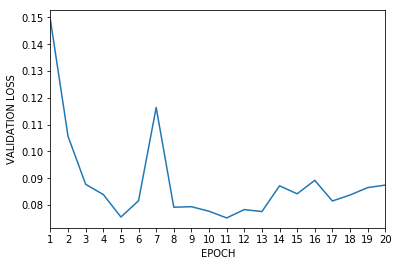

In [34]:
plot_history_loss(hist)

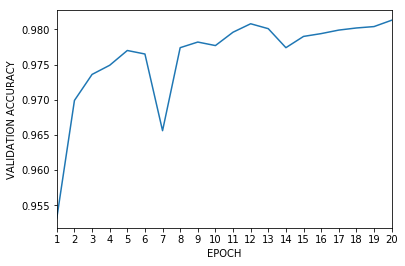

In [35]:
plot_history_accuracy(hist)

In [36]:
#3 Hidden Layers - TanH Activation,  SGD with Momentum Optimizer
def build_layers():
    
    #Input Layer
    model = build_layer_1(512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    model = add_dense(model,512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model, optimizer = test_optimizer_1)
    
    return hist

In [37]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.3283 - acc: 0.9008 - val_loss: 0.1783 - val_acc: 0.9464
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1772 - acc: 0.9465 - val_loss: 0.1342 - val_acc: 0.9596
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1321 - acc: 0.9597 - val_loss: 0.1030 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1049 - acc: 0.9674 - val_loss: 0.0920 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0891 - acc: 0.9722 - val_loss: 0.0880 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0775 - acc: 0.9753 - val_loss: 0.0830 - val_acc: 0.9746
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0676 - acc: 0.9785 - val_loss: 0.

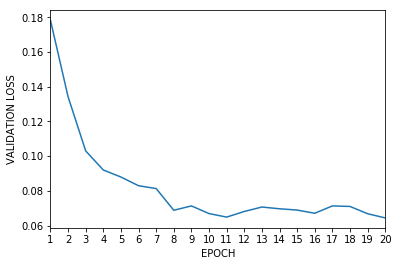

In [38]:
plot_history_loss(hist)

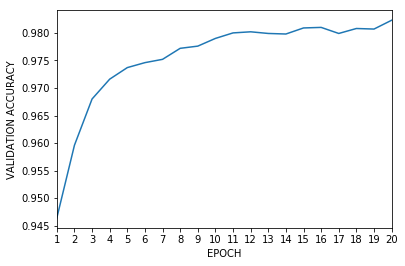

In [39]:
plot_history_accuracy(hist)

In [40]:
#3 Hidden Layers - TanH Activation, Adagrad Optimizer
def build_layers():
    
    #Input Layer
    model = build_layer_1(512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)

    #Hidden Layers
    model = add_dense(model,1024)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    model = add_dense(model,512)
    model = add_activation(model, 'tanh')
    model = add_droput(model,0.2)
    
    #Output Layer
    hist = build_layer_final(model, optimizer = 'adagrad')
    
    return hist

In [41]:
hist = build_layers()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.5221 - acc: 0.8756 - val_loss: 0.1544 - val_acc: 0.9515
Epoch 2/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1362 - acc: 0.9583 - val_loss: 0.1040 - val_acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1007 - acc: 0.9690 - val_loss: 0.0972 - val_acc: 0.9707
Epoch 4/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0784 - acc: 0.9757 - val_loss: 0.0821 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0643 - acc: 0.9799 - val_loss: 0.0768 - val_acc: 0.9775
Epoch 6/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0541 - acc: 0.9831 - val_loss: 0.0767 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0468 - acc: 0.9850 - val_loss: 0.

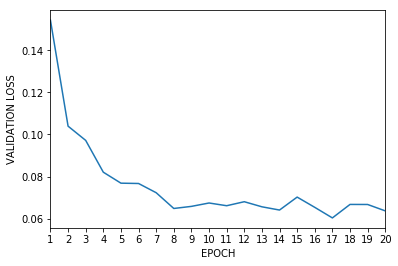

In [42]:
plot_history_loss(hist)

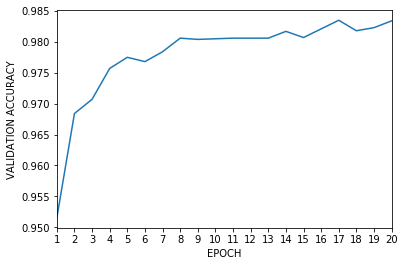

In [43]:
plot_history_accuracy(hist)